In [1]:
#load the dataset
import gzip

def load_txt_gz(file_path):
    with gzip.open(file_path, 'rt', errors='ignore') as file:
        content = [line.strip() for line in file]
    return content

#file_path = 'C:/Users/nicco/OneDrive - ETH Zurich/Master EST/23FS - DTU/Computational Social Science/Ass3_4/quotes_2008-08.txt.gz'
content = load_txt_gz('quotes_2008-08.txt.gz')

# Print the first few lines to inspect the content
for line in content[:10]:
    print(line)

P	http://codeproject.com/kb/silverlight/convertsilverlightcontrol.aspx
T	2008-08-01 00:00:00
Q	how to create property binding in a visual webgui silverlight control
Q	videoplayer silverlight controls videoplayer videoplayer silverlight controls version 1 0 0 0 culture neutral publickeytoken null
Q	videoplayer controls videoplayer videoplayer controls

P	http://wallstreetexaminer.com/?p=2987
T	2008-08-01 00:00:01

P	http://news.bbc.co.uk/go/rss/-/1/hi/scotland/highlands_and_islands/7535558.stm


In [2]:
#Check RAM usage
import os
import psutil

def print_used_ram():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    used_ram = mem_info.rss / (1024 * 1024)  # Convert to MB
    print(f"Used RAM: {used_ram:.2f} MB")

print_used_ram()

Used RAM: 6413.29 MB


'Q\thaide calu pune-l la p m nt'

In [4]:
sub = []
for line in content[:1000000]:
    sub.append(line)

In [4]:
import gzip
filename ="subset.txt.gz"

with gzip.open(filename, 'wt') as fo:
    for line in content[:100]:
        fo.write(line)

In [66]:
# Print the first few lines to inspect the content
for line in content[30:50]:
    print(line)

Q	foi uma promessa que fiz hoje quinta-feira ao presidente da rep blica que esteve presente no encontro
Q	independente para que n o haja confus o com interesses privados
Q	a inclus o social de outros talentos de outras partes do mundo que portugal seja um local atraente para que todos os que est o l fora queiram vir para aqui
Q	o que nacional bom
Q	ser portugu s
Q	precedente muito grave
Q	dispon vel para ajudar

P	http://marinelog.com/docs/newsmmvii/2008jul00312.html
T	2008-08-01 00:00:04
Q	it is no longer feasible or affordable to purchase the most capable multi-mission platform and then limit its use to execute tailored mission areas or focus on specific threats as asymmetric threats continue to evolve so will traditional threats the navy must find affordable and adaptable ways to fill current and future warfighting gaps
Q	a capable ship which meets the requirements for which it was designed
Q	the ddg 1000 cannot perform area air defense specifically it cannot successfully employ the

In [99]:
import networkx as nx
from textblob import TextBlob
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
from math import log


nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_and_get_sentiment_score(phrase):
    tokens = nltk.word_tokenize(phrase)
    non_stopwords = [word for word in tokens if word.lower() not in stop_words]
    non_stopword_count = len(non_stopwords)
    filtered_phrase = ' '.join(non_stopwords)
    sentiment_score = TextBlob(filtered_phrase).sentiment.polarity
    return sentiment_score, non_stopword_count

start = time.time()

# Initialize an empty graph
G = nx.DiGraph()

current_node = None
counter=0

sentiment_scores = defaultdict(float)
non_stopword_counts = defaultdict(int)

n_lines= 10**4
for line in content[:n_lines]:
    counter += 1
     
    parts = line.split("\t")
    
    if parts[0] == "P":
        current_node = parts[1].strip()
        G.add_node(current_node, name=current_node, key_phrases=[], links=[])
    elif current_node is not None:
        if parts[0] == "T":
            G.nodes[current_node]["timestamp"] = parts[1].strip()
        elif parts[0] == "Q":
            phrase = parts[1].strip()
            G.nodes[current_node]["key_phrases"].append(phrase)
            sentiment_score, non_stopword_count = preprocess_and_get_sentiment_score(phrase)
            sentiment_scores[current_node] += sentiment_score
            non_stopword_counts[current_node] += non_stopword_count
        elif parts[0] == "L":
            link = parts[1].strip()
            if not G.has_node(link):
                G.add_node(link, name=link, key_phrases=[], links=[])
            G.add_edge(current_node, link)
    
    if counter % (n_lines/10) == 0:
        print(f"{counter/n_lines} in {(time.time() - start)/60} minuts")
        
for node in G.nodes:
    non_stopword_count = non_stopword_counts[node]
    if non_stopword_count not in [0,1]:
        log_non_stopword_count = log(non_stopword_count)
        normalized_sentiment_score = sentiment_scores[node] / log_non_stopword_count
    else:
        normalized_sentiment_score = sentiment_scores[node]
    G.nodes[node]["normalized_sentiment_score"] = normalized_sentiment_score
        
stop = time.time()
print(f"time taken to process: {(stop - start)/60} minuts")

# Now G contains the network created from the list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ejer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ejer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0.1 in 0.002120061715443929 minuts
0.2 in 0.0035206158955891926 minuts
0.3 in 0.004637328783671061 minuts
0.4 in 0.005437326431274414 minuts
0.5 in 0.007304036617279052 minuts
0.6 in 0.009070487817128499 minuts
0.7 in 0.010720789432525635 minuts
0.8 in 0.012720791498819987 minuts
0.9 in 0.013970839977264404 minuts
1.0 in 0.015538036823272705 minuts
time taken to process: 0.015588009357452392 minuts


In [100]:
G.nodes()['http://marinelog.com/docs/newsmmvii/2008jul00312.html']

{'name': 'http://marinelog.com/docs/newsmmvii/2008jul00312.html',
 'key_phrases': ['it is no longer feasible or affordable to purchase the most capable multi-mission platform and then limit its use to execute tailored mission areas or focus on specific threats as asymmetric threats continue to evolve so will traditional threats the navy must find affordable and adaptable ways to fill current and future warfighting gaps',
  'a capable ship which meets the requirements for which it was designed',
  "the ddg 1000 cannot perform area air defense specifically it cannot successfully employ the standard missile sm-2 sm-3 or sm-6 and is incapable of conducting ballistic missile defense although superior in littoral asw the ddg 1000 lower power sonar design is less effective in the blue water than ddg-51 capability ddg 1000's advanced gun system ags design provides enhanced naval fires support capability in the littorals with increased survivability however with the accelerated advancement of p

In [101]:
# Sort the nodes based on their normalized_sentiment_score
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]["normalized_sentiment_score"])

# Retrieve the 10 nodes with the lowest sentiment scores
lowest_sentiment_nodes = sorted_nodes[:10]

# Retrieve the 10 nodes with the highest sentiment scores
highest_sentiment_nodes = sorted_nodes[-10:]

print("Key phrases of the articles with the 10 lowest sentiment scores:")
for node, attributes in lowest_sentiment_nodes:
    print(f"Node: {node}")
    print("Key phrases:", attributes["key_phrases"])
    print("\n")

print("Key phrases of the articles with the 10 highest sentiment scores:")
for node, attributes in highest_sentiment_nodes:
    print(f"Node: {node}")
    print("Key phrases:", attributes["key_phrases"])
    print("\n")


Key phrases of the articles with the 10 lowest sentiment scores:
Node: http://dotshout.com/news/view.php?post_id=216352
Key phrases: ['no be afraid be very afraid']


Node: http://blog.myspace.com/index.cfm?fuseaction=blog.view&friendid=29757032&blogid=420012898
Key phrases: ['fuck my ankle']


Node: http://guardian.co.uk/world/2008/aug/01/china.usa?gusrc=rss&feed=networkfront
Key phrases: ['sabotage the olympics', 'the disgusting actions of this group of anti-chinese lawmakers', 'exposed evil motives to politicise the olympics and interrupt and sabotage the beijing olympics', "by arranging such a meeting between its leader and these people and making irresponsible remarks on china's human rights and religious situation the us side has rudely interfered in china's internal affairs and sent a seriously wrong message to anti-china hostile forces"]


Node: http://guardian.co.uk/world/2008/aug/01/canada?gusrc=rss&feed=networkfront
Key phrases: ['we heard this blood-curdling scream and turn

In [102]:
# Calculate summary statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)

# Print summary statistics
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Density: {density:.4f}")

# Calculate and print some additional statistics if the graph is not empty
if num_nodes > 0:
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    
    max_in_degree_node = max(in_degrees, key=in_degrees.get)
    max_out_degree_node = max(out_degrees, key=out_degrees.get)
    
    print(f"Node with maximum in-degree: {max_in_degree_node} (in-degree: {in_degrees[max_in_degree_node]})")
    print(f"Node with maximum out-degree: {max_out_degree_node} (out-degree: {out_degrees[max_out_degree_node]})")

    # Calculate connected components for a weakly connected version of the graph
    G_weak = nx.DiGraph.to_undirected(G)
    connected_components = [c for c in nx.connected_components(G_weak)]
    num_connected_components = len(connected_components)
    largest_connected_component = max(connected_components, key=len)
    
    print(f"Number of connected components: {num_connected_components}")
    print(f"Size of the largest connected component: {len(largest_connected_component)}")

TypeError: 'dict' object is not callable

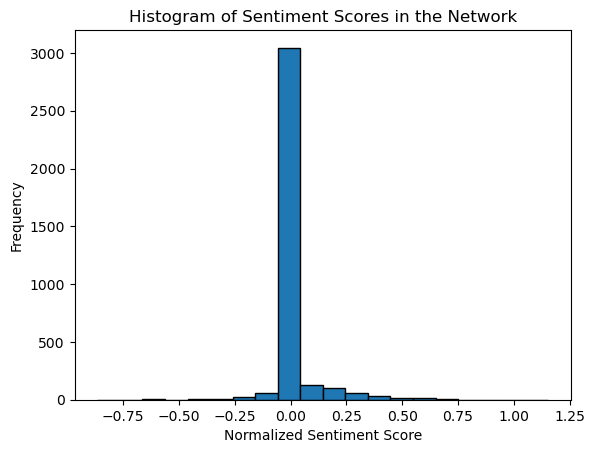

Assortativity coefficient based on sentiment scores: 0.0596


In [103]:
import matplotlib.pyplot as plt

# Collect sentiment scores from all nodes
sentiment_scores_list = [attributes["normalized_sentiment_score"] for _, attributes in G.nodes(data=True)]

# Plot the histogram of sentiment scores
plt.hist(sentiment_scores_list, bins=20, edgecolor='black')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores in the Network')
plt.show()

# Compute the assortativity coefficient based on sentiment scores
sentiment_assortativity = nx.attribute_assortativity_coefficient(G, "normalized_sentiment_score")
print(f"Assortativity coefficient based on sentiment scores: {sentiment_assortativity:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw

# Discretize sentiment scores into bins
sentiment_scores_list = [attributes["normalized_sentiment_score"] for _, attributes in G.nodes(data=True)]
num_bins = 10
sentiment_bins = np.linspace(min(sentiment_scores_list), max(sentiment_scores_list), num_bins + 1)
bin_indices = np.digitize(sentiment_scores_list, sentiment_bins) - 1

# Assign each node a bin ID as the group attribute
for idx, node in enumerate(G.nodes()):
    G.nodes[node]["group"] = bin_indices[idx]

# Customize the network visualization styles
styles = {
    "Node": {
        "color_map": {
            0: "#800000",
            1: "#ff0000",
            2: "#ff6600",
            3: "#ffcc00",
            4: "#ffff00",
            5: "#ccff00",
            6: "#99ff00",
            7: "#33ff00",
            8: "#00ff00",
            9: "#008000"
        }
    },
}
dict = nx.get_node_attributes(G,'group')

# Draw the graph with node colors based on their sentiment scrore
dict = nx.get_node_attributes(G,'sentiment score')
nx.set_node_attributes(G,dict,"group")
results = nw.visualize(G)

In [89]:
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
import numpy as np


# Visualize the network with the colored nodes
nw.set_node_attributes(G, "group", "group")
results = nw.visualize(G, config=styles)


AttributeError: module 'netwulf' has no attribute 'set_node_attributes'

In [76]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

In [77]:
X = degrees = [d for n, d in G.degree()]
x_log = True
y_log = True
bar_hist = False


# Create histogram
bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), np.round(math.ceil(max(X))/100).astype(np.int)) #create bins with width of two
if x_log:
    bins = np.logspace(0, np.log10(math.ceil(max(X))), np.round(math.ceil(max(X))/2500).astype(np.int))
hist, edges = np.histogram(X, bins = bins, density = True) #change density to false if you want y = count (instead of probability distribution))
x = (edges[1:]+edges[:-1])/2
width = bins[1]-bins[0]

xx, yy = zip(*[(i,j) for (i,j) in zip(x, hist) if j>0]) #only keep values above zero

fig, ax = plt.subplots()
if bar_hist:
    ax.bar(xx, yy, width = width *0.9)
else:
    ax.plot(xx, yy, marker = '.')

ax.set_xlabel('Degrees')
ax.set_ylabel('Probability distribution')
if x_log:
    ax.set_xscale('log')
if y_log:
    ax.set_yscale('log')

C:\Users\Ejer\AppData\Local\Temp\ipykernel_11936\4258825456.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), np.round(math.ceil(max(X))/100).astype(np.int)) #create bins with width of two
C:\Users\Ejer\AppData\Local\Temp\ipykernel_11936\4258825456.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or

IndexError: index 1 is out of bounds for axis 0 with size 1